In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model as lm
import pandas as pd
from tensorflow import keras

In [ ]:
# 과거의 데이터 준비
lemonade = pd.read_csv("./lemonade.csv")

In [ ]:
x = lemonade[['온도']]
y = lemonade[['판매량']]
print(x.shape, y.shape)

# 모델을 만든다.
X = keras.layers.Input(shape = [1]) # 독립변수 개수
Y = keras.layers.Dense(1)(X)
model = keras.models.Model(X, Y)
model.compile(loss = 'mse')

# 모델을 학습시킨다.
model.fit(x, y, epochs = 1000, verbose = 0)
model.fit(x, y, epochs = 10)

# 모델을 이용
print(model.predict(x))
print(model.predict([[15]]))

(6, 1) (6, 1)
Epoch 1/10
1/1 [==============================] - 0s 12ms/step - loss: 419.1613
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 418.2069
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 417.2537
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 416.3015
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 415.3503
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 414.4003
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 413.4513
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 412.5036
Epoch 9/10
1/1 [==============================] - 0s 8ms/step - loss: 411.5570
Epoch 10/10
1/1 [==============================] - 0s 49ms/step
[[22.178041]
 [23.236332]
 [24.294622]
 [25.352913]
 [26.411203]
 [27.469492]]
1/1 [==============================] - 0s 32ms/step
[[16.886591]]


In [ ]:
pd.read_csv("./iris.csv")

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
# 원핫인코딩
ENCODING = pd.get_dummies(pd.read_csv("./iris.csv"))
cols = ENCODING.columns.tolist()

Indep = ENCODING[cols[:4]]
Subord = ENCODING[cols[4:]]
print(Indep.shape, Subord.shape)
print(len(Subord.columns))
# 모델을 만든다.
X = keras.layers.Input(shape=[4])
Y = keras.layers.Dense(len(Subord.columns), activation = 'softmax')(X)
model = keras.models.Model(X, Y)
model.compile(loss = "categorical_crossentropy",
              metrics = "accuracy")

# 학습
model.fit(Indep, Subord, epochs = 10, verbose = 1)


# 모델 이용
print()
print(model.predict(Indep[:5]))
print(Subord[:5])

(150, 4) (150, 3)
3
Epoch 1/10
5/5 [==============================] - 0s 3ms/step - loss: 1.7853 - accuracy: 0.3333
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 1.7213 - accuracy: 0.3200
Epoch 3/10
5/5 [==============================] - 0s 2ms/step - loss: 1.6827 - accuracy: 0.2800
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 1.6528 - accuracy: 0.2333
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 1.6265 - accuracy: 0.1933
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 1.6048 - accuracy: 0.1933
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 1.5843 - accuracy: 0.1400
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 1.5650 - accuracy: 0.1200
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 1.5469 - accuracy: 0.0933
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 1.5317 - accuracy: 0.0800

1/1 [=============

##mnist

In [ ]:
(data, answer), (testData, testAnswer) = keras.datasets.mnist.load_data()

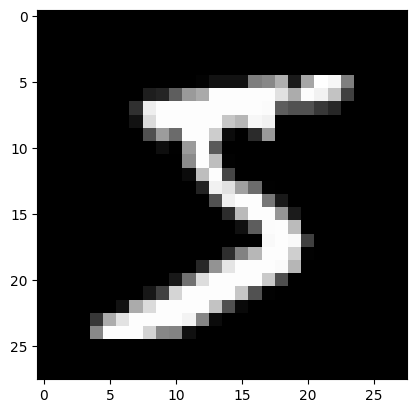

In [ ]:
plt.imshow(data[0], cmap = 'gray')
plt.show()

데이터 전처리
* 값을 0~1 범위의 값으로 변환

In [ ]:
data = data / 255
testData = testData / 255

In [ ]:
for d in data[999]:
  for j in d:
    print(f'{j:.1f}', end = ' ')
  print()
# 6

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.6 0.8 0.1 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.5 1.0 1.0 0.3 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.2 1.0 1.0 0.7 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.9 1.0 0.8 0.1 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.8 1.0 0.9 0.2 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.7 1.0 1.0 0.2 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.8 1.0 1.0 0.4 0.0 0.0 0.0 0.0 0.0 

## 모델 구조 작성
* 입력층, 은닉층, 출력층 생성
* 활성화 함수
  * 은닉층 : ReLU 함수
  * 출력층 : softmax 함수


In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]), # 입력층, 1차원 이미지 배열로 변환
    keras.layers.Dense(200, activation = 'relu'), # 은닉층
    keras.layers.Dense(100, activation = 'relu'),# 은닉층
    keras.layers.Dense(50, activation = 'relu'),# 은닉층
    keras.layers.Dense(10, activation = 'softmax'), # 출력층
])

## 컴파일
1. 학습 방법 설정
  * 손실 함수, 최적화 함수, 평가 지표 종류 선택

  * 손실 함수
    * 예측값과 실제값 사이의 차이를 수치로 나타내는 함수
    * 이진 분류 모델 : binary_crossentropy
    * 다중 분류 모델
      * 정답이 원-핫 인코딩 : categorical_crossentropy
      * 정답이 정수일 때 : sparse_categorical_crossentropy
    * 회귀 모델 : 평균 제곱 오차 (Mean Squared Error, MSE)
  
  
  2. 최적화 함수
    * 손실 함수의 값을 최소화하도록 가중치와 바이어스를 수정해 나가는 함수
    * 경사 하강법 : Gradient Descent
    * 확률적 경사 하강법 : Stochastic Gradient Descent
    * Adam
  

  3. 평가 지표
    * 모델이 얼마나 잘 분류, 예측 하는지를 평가하는 지표
    * 분류 모델 : Accuracy, Recall, Precision
    * 회귀 모델 : MAE
  

In [ ]:
model.compile(optimizer = "adam", # 최적화
              loss = 'sparse_categorical_crossentropy', # 손실 함수
              metrics = 'accuracy' # 평가 지표
              )

## 학습
1. 반복 학습 횟수 (epochs) 설정
  * 너무 많으면 훈련용 데이터만 정확히 예측하는 과대적합 문제 발생

In [ ]:
model.fit(data, answer, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2257 - accuracy: 0.9323
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0931 - accuracy: 0.9715
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0683 - accuracy: 0.9787
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0517 - accuracy: 0.9829
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0410 - accuracy: 0.9870


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 200)               157000    
                                                                 
 dense_25 (Dense)            (None, 100)               20100     
                                                                 
 dense_26 (Dense)            (None, 50)                5050      
                                                                 
 dense_27 (Dense)            (None, 10)                510       
                                                                 
Total params: 182660 (713.52 KB)
Trainable params: 182660 (713.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


모델 평가

In [ ]:
model.evaluate(testData, testAnswer)

313/313 [==============================] - 1s 2ms/step - loss: 0.0723 - accuracy: 0.9791


[0.07225316017866135, 0.9790999889373779]

In [ ]:
pred = model.predict(testData)
print(type(pred), pred.shape)

313/313 [==============================] - 1s 1ms/step
<class 'numpy.ndarray'> (10000, 10)


In [ ]:
print(model.predict(testData).round(2)[:5])

313/313 [==============================] - 0s 1ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


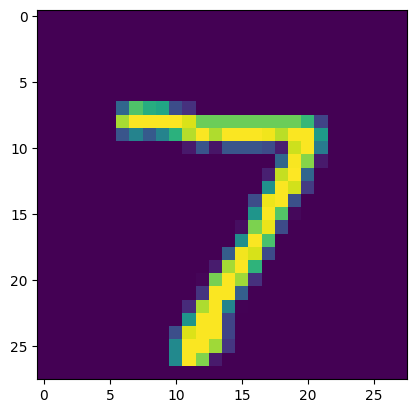

In [ ]:
plt.imshow(testData[0])
plt.show()

데이터 예측

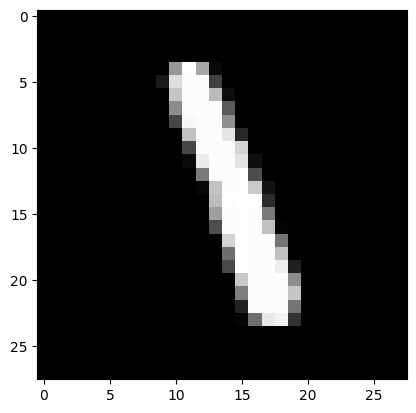

In [ ]:
plt.imshow(testData[46], cmap='gray')
plt.show()

In [ ]:
pred = model.predict(testData[46].reshape(1, 28, 28))
print(type(pred), pred.shape)
print(pred.round(2))
print(np.argmax(pred), testAnswer[46])

1/1 [==============================] - 0s 17ms/step
<class 'numpy.ndarray'> (1, 10)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1 1
